In [7]:
import pandas as pd

df = pd.read_csv("T-shirt.csv")
df

,Height,Weight,T-shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [8]:
x = df[['Height','Weight']]
y = df['T-shirt Size']
print(x.shape)
print(y.shape)

(18, 2)
(18,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=5)
model = nn.fit(x,y)
y_pred = model.predict(x)
y_pred

array(['M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [26]:
diff = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
diff

,Actual,Predicted
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
5,M,M
6,M,L
7,L,M
8,L,L
9,L,L


In [27]:
"""---Confusion Matrix---"""

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[10,  1],
       [ 1,  6]], dtype=int64)

In [28]:
df=pd.get_dummies(df, drop_first=True)
df

,Height,Weight,T-shirt Size_M
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [29]:
TN = cm[0][0] #True Negetive
TP = cm[1][1] #True Positive
FN = cm[1][0] #False Negetive
FP = cm[0][1] #False Positive
print(TN)
print(TP)
print(FN)
print(FP)

10
6
1
1


In [30]:
#METHOD TO CALCULATE 'ACCURACY SCORE' USING FORMULA

Accuracy = (TN + TP) / (TN + TP + FN + FP)
print(Accuracy) #Accuracy for n_neighbors = 5 

#For n_neighbors = 3 Accuracy is '1.0'

0.8888888888888888


In [32]:
#METHOD TO CALCULATE 'ACCURACY SCORE' USING LIBRARY

from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y, y_pred))

Accuracy:  0.8888888888888888


In [34]:
#METHOD TO CALCULATE 'ERROR RATE'

Error_Rate = 1-Accuracy
print(Error_Rate)

0.11111111111111116


In [35]:
"""---Sensitivity[It is for +ve cases]---"""

Sensitivity = TP/(TP + FN)
print(Sensitivity)

0.8571428571428571


In [36]:
"""---Specificity[It is for -ve cases]---"""

Specificity = TN/(TN + FP)
print(Specificity)

0.9090909090909091


In [45]:
l = []
for i in range(1,18):
    nn = KNeighborsClassifier(n_neighbors=i)
    model = nn.fit(x,y)
    y_pred = model.predict(x)
    from sklearn.metrics import accuracy_score
    l.append(accuracy_score(y, y_pred))

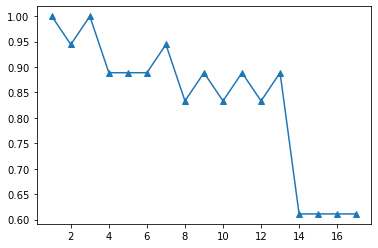

[1.0, 0.9444444444444444, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9444444444444444, 0.8333333333333334, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112]


In [46]:
import matplotlib.pyplot as plt 

plt.plot(range(1,18),l,marker="^")
plt.show()
print(l)

In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
x = df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','SkinThickness','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
print(y_pred)

[ 4.59954594e-01  3.80239747e-01  2.12342884e-01 -3.86688510e-02
  2.59843145e-01  3.13223890e-01  3.98602734e-01  1.43042165e-01
  1.84150528e-01  2.33610742e-01  4.63183983e-01  6.43846970e-02
  1.18172098e+00  6.74172073e-01 -3.41558250e-02  6.84984897e-01
  2.81878613e-01  3.62033756e-01  1.72141534e-01  2.03382082e-01
  4.30300626e-01  1.93234806e-01  1.04546584e+00  3.32335783e-01
  5.16388154e-02  4.21713029e-01  2.39696378e-01  7.17488802e-01
  8.41984016e-02  5.11167671e-01  4.26465056e-01  3.67646881e-01
  2.69066959e-02  6.33037586e-01  1.73488254e-01  5.69840193e-01
  1.04816474e-01  2.39828459e-01  1.17147162e-01  5.51938890e-01
  2.49338980e-01  9.23745089e-02 -5.59002742e-02  3.55269698e-01
  6.95943712e-02 -1.31731952e-01  6.90146960e-01  7.74790295e-01
  8.50897766e-02  1.77862993e-01 -2.77417995e-01  2.42839887e-01
  8.15258484e-01  1.71599058e-04  6.70338218e-01  1.22991838e-01
  5.82006387e-01  3.68288473e-01  5.29924785e-01  1.98006477e-01
  5.83305809e-01 -1.93200

In [48]:
diff = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
diff.to_csv("diabetes_pred.csv")

In [49]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=27)
model = nn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 11],
       [27, 28]], dtype=int64)

In [51]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(TN)
print(TP)
print(FN)
print(FP)

88
28
27
11


In [52]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7532467532467533


In [53]:
Sensitivity = TP/(TP + FN)
print(Sensitivity)

0.509090909090909


In [54]:
Specificity = TN/(TN + FP)
print(Specificity)

0.8888888888888888


In [55]:
l = []
for i in range(1,154):
    nn = KNeighborsClassifier(n_neighbors=i)
    model = nn.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import accuracy_score
    l.append(accuracy_score(y_test, y_pred))

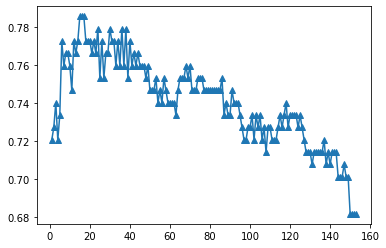

[0.7207792207792207, 0.7272727272727273, 0.7402597402597403, 0.7207792207792207, 0.7337662337662337, 0.7727272727272727, 0.7597402597402597, 0.7662337662337663, 0.7662337662337663, 0.7597402597402597, 0.7467532467532467, 0.7727272727272727, 0.7662337662337663, 0.7727272727272727, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7727272727272727, 0.7727272727272727, 0.7727272727272727, 0.7662337662337663, 0.7727272727272727, 0.7662337662337663, 0.7792207792207793, 0.7532467532467533, 0.7727272727272727, 0.7532467532467533, 0.7662337662337663, 0.7662337662337663, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7597402597402597, 0.7727272727272727, 0.7597402597402597, 0.7792207792207793, 0.7597402597402597, 0.7792207792207793, 0.7532467532467533, 0.7727272727272727, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7532467532467533, 0.7597402597402597, 0.7467532467532467,

In [56]:
import matplotlib.pyplot as plt 

plt.plot(range(1,154),l,marker="^")
plt.show()
print(l)